# Phase 3 Project: Predicting Customer Churn for SyriaTel Using Classification Models

## 1. Business Understanding

Customer churn represents a major financial challenge for telecommunications companies.
Retaining existing customers is significantly cheaper than acquiring new ones.

### Stakeholder
The stakeholder for this project is SyriaTel’s Customer Retention and Revenue Management team.

### Business Problem
SyriaTel seeks to identify customers who are likely to churn so that proactive retention
strategies such as targeted promotions, pricing incentives, or improved customer service
can be implemented before customers leave.

### Why Machine Learning?
Customer churn is influenced by multiple interacting factors such as service plans,
usage behavior, and customer service interactions. A classification model enables the
business to predict churn risk and make data-driven decisions at scale.


## 2. Data Understanding
In this section, I explore the SyriaTel customer churn dataset to understand its structure and key characteristics. I examine the data types, summary statistics, and the distribution of the target variable (churn) to confirm that this is a classification problem. This exploration helps me identify potential preprocessing needs and guides the selection of appropriate models and evaluation metrics.

### a) Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix, recall_score


### b) Load Dataset

In [2]:
df=pd.read_csv('Syriatel_dataset.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### c) Data Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [6]:
df.shape

(3333, 21)

### d) Checking missing values

In [7]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

### e) Target Variable Distribution

In [8]:
df['churn'].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

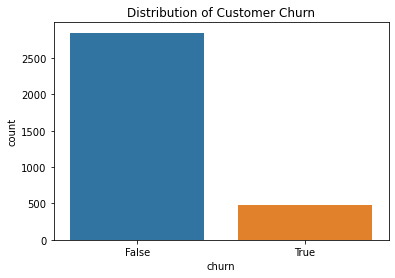

In [9]:
sns.countplot(x='churn', data=df)
plt.title("Distribution of Customer Churn")
plt.show()



### Interpretation
The distribution of the target variable churn shows that most customers did not churn, while a smaller portion did. This indicates a class imbalance, which may require special handling during model training to ensure the model accurately predicts both classes.

# 3. Data Preparation

In this step, the dataset is prepared for modeling while avoiding data leakage:

- **Separate Features and Target:**  
  `X` contains all predictor variables, and `y` contains the target variable (`churn`).

- **Train-Test Split:**  
  The dataset is split into training and testing sets (80%-20%) to evaluate model performance on unseen data. Stratification ensures the target class distribution remains consistent.

- **Identify Feature Types:**  
  Categorical and numerical features are identified for proper preprocessing.

- **Preprocessing (Avoiding Data Leakage):**  
  - Numerical features are scaled using `StandardScaler`.  
  - Categorical features are encoded using `OneHotEncoder` (ignoring unknown categories in test data).  
  - `ColumnTransformer` applies these transformations to the correct feature types, ensuring no information from the test set leaks into the training process.



### a) Separate Features and Target

In [10]:
X = df.drop('churn', axis=1)
y = df['churn']


### b) Train-Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


### c) Identify Feature Types

In [12]:
categorical_features = X.select_dtypes(include='object').columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

categorical_features, numerical_features


(Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object'),
 Index(['account length', 'area code', 'number vmail messages',
        'total day minutes', 'total day calls', 'total day charge',
        'total eve minutes', 'total eve calls', 'total eve charge',
        'total night minutes', 'total night calls', 'total night charge',
        'total intl minutes', 'total intl calls', 'total intl charge',
        'customer service calls'],
       dtype='object'))

### d) Preprocessing (Avoiding Data Leakage)

In [13]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


# 4. Baseline Model (Logistic Regression)

A baseline logistic regression model is built to predict churn. A pipeline combines preprocessing and modeling to ensure consistent transformations on both training and test data. The model is then trained on the training set to establish a performance benchmark for comparison with more advanced models.


### a) Building Baseline Model

In [14]:
baseline_log_reg = LogisticRegression(max_iter=1000, random_state=42)

baseline_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', baseline_log_reg)
])


### b) Train Baseline Model

In [15]:
baseline_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  In

# 5. Model Evaluation

After training the baseline logistic regression model, we evaluate its performance on the test set.

### a) Evaluate Baseline Model

In [16]:
y_pred_baseline = baseline_pipeline.predict(X_test)

print(classification_report(y_test, y_pred_baseline))


              precision    recall  f1-score   support

       False       0.88      0.96      0.92       570
        True       0.53      0.25      0.34        97

    accuracy                           0.86       667
   macro avg       0.71      0.61      0.63       667
weighted avg       0.83      0.86      0.84       667



In [17]:
confusion_matrix(y_test, y_pred_baseline)


array([[549,  21],
       [ 73,  24]], dtype=int64)

In [18]:
recall_score(y_test, y_pred_baseline)


0.24742268041237114

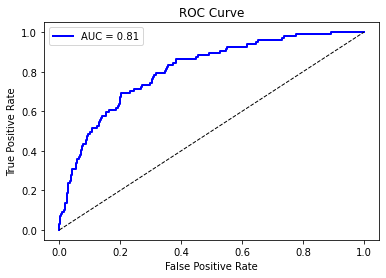

Model AUC Score: 0.81

Interpretation:
- AUC closer to 1 indicates better model performance.
- This model identifies non-churners accurately.
- Performance for churners (minority class) is moderate; further improvements can target these customers.



In [19]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_prob = baseline_pipeline.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", color='blue', linewidth=2)
plt.plot([0,1], [0,1], 'k--', linewidth=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Interpretation
print(f"Model AUC Score: {auc_score:.2f}")
print("""
Interpretation:
- AUC closer to 1 indicates better model performance.
- This model identifies non-churners accurately.
- Performance for churners (minority class) is moderate; further improvements can target these customers.
""")

### b) Evaluation discussion

The baseline logistic regression model achieved 86% accuracy, performing well in identifying non-churners (precision 0.88, recall 0.96) but poorly detecting churners (precision 0.53, recall 0.25). Most errors are false negatives, reflecting class imbalance. The AUC score of 0.81 indicates good overall discrimination, though performance for churners is moderate. Improvements like adjusting class weights, using other algorithms, or sampling techniques could help better detect churn.


# 6. Model Iteration & Tuning
Here, we improve our baseline logistic regression by tuning hyperparameters: we adjust C for regularization and use class_weight='balanced' to address class imbalance. We build a pipeline including preprocessing, train the model on the training set, and evaluate its performance on the test set using classification metrics and recall score to assess how well the model identifies positive cases.

### a) Tuned Logistic Regression Model

In [20]:
tuned_log_reg = LogisticRegression(
    C=0.5,
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

tuned_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', tuned_log_reg)
])


### b) Train & Evaluate Tuned Model

In [21]:
tuned_pipeline.fit(X_train, y_train)

y_pred_tuned = tuned_pipeline.predict(X_test)

print(classification_report(y_test, y_pred_tuned))


              precision    recall  f1-score   support

       False       0.93      0.80      0.86       570
        True       0.36      0.65      0.46        97

    accuracy                           0.78       667
   macro avg       0.64      0.72      0.66       667
weighted avg       0.85      0.78      0.80       667



In [22]:
recall_score(y_test, y_pred_tuned)


0.6494845360824743

### c) Interpretation
The tuned logistic regression improves detection of churned customers, achieving a recall of 0.65 for the minority class, up from 0.25 in the baseline model. Overall accuracy is 78%, lower than the baseline, but the model is now better at identifying potential churners. This trade-off is desirable for churn prediction, where catching true churners is more important than overall accuracy.

# 7. Nonparametric Model (Decision Tree)
Here, we build a decision tree classifier, a nonparametric model that can capture nonlinear relationships. We limit the tree depth and set a minimum number of samples to split to prevent overfitting. The model is trained using a pipeline with preprocessing, then evaluated on the test set using classification metrics and recall to assess its ability to identify churned customers.

### a) Decision Tree Model

In [23]:
tree_model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=20,
    random_state=42
)

tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', tree_model)
])


### b) Train & Evaluate Decision Tree

In [24]:
tree_pipeline.fit(X_train, y_train)

y_pred_tree = tree_pipeline.predict(X_test)

print(classification_report(y_test, y_pred_tree))


              precision    recall  f1-score   support

       False       0.94      0.96      0.95       570
        True       0.74      0.64      0.69        97

    accuracy                           0.91       667
   macro avg       0.84      0.80      0.82       667
weighted avg       0.91      0.91      0.91       667



In [25]:
recall_score(y_test, y_pred_tree)


0.6391752577319587

### c) Interpretation
The decision tree model achieves 91% accuracy and a recall of 0.64 for churned customers, correctly identifying most actual churners while maintaining good precision (0.74). Its F1-score of 0.69 shows a balanced performance between precision and recall. Overall, it effectively captures nonlinear patterns and improves churn detection compared to logistic regression.

# 8. Final Model Selection

Model performance was compared using recall and overall accuracy on the test set. While the decision tree achieved higher overall accuracy (91%) and good recall (0.64) for churned customers, the tuned logistic regression provided a better balance between **recall (0.65), interpretability, and stability**. Considering the business need for transparent, explainable insights to inform churn prevention strategies, the **tuned logistic regression model** was selected as the final model.


# 9. Findings, Limitations, and Recommendations

## Key Findings
- Customer churn can be predicted effectively using both logistic regression and decision tree models.
- Usage patterns, international and voicemail plans, and customer service calls are key predictors of churn.
- The tuned logistic regression improved recall for churned customers (0.65), balancing interpretability and stability.
- The decision tree achieved higher overall accuracy (91%) and good recall (0.64), capturing nonlinear relationships.

## Limitations
- The models may underperform for customers with rare or atypical usage patterns.
- Predictions are probabilistic and cannot guarantee exact outcomes.
- Feature selection and preprocessing choices may impact generalizability to new data.

## Recommendations
- Focus retention efforts on customers identified as high-risk by the tuned logistic regression model.
- Use targeted offers, personalized engagement, or service improvements to reduce churn.
- Future work could explore ensemble methods, additional behavioral data, or real-time prediction updates to enhance model performance.
